In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('/content/drive/My Drive/UNSW_NB15_training-set.csv')
df2 = pd.read_csv('/content/drive/My Drive/UNSW_NB15_testing-set.csv')

In [ ]:
df2.shape

In [7]:
df.shape

(175341, 44)

In [8]:
df.head(3)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,Normal
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,Normal
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,Normal


In [9]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


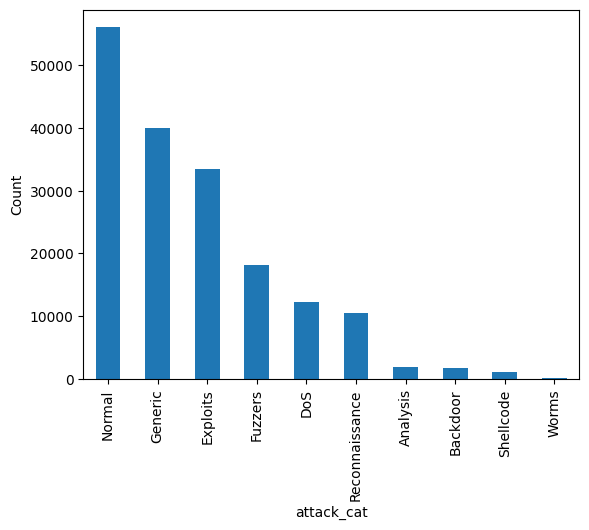

In [10]:
# Data class bar chartا
df['attack_cat'].value_counts().plot(kind='bar')
plt.xlabel('attack_cat')
plt.ylabel('Count')
plt.show()

# ------------------------------------------------

# PreProccessing

In [11]:
#We remove duplicate, undefined, etc. data from the data set.

In [12]:
df.drop("id", axis = 1 , inplace = True)

In [13]:
df2.drop("id", axis = 1 , inplace = True)

In [14]:
df.duplicated().sum()

67601

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(107740, 43)

In [17]:
df.isnull().sum().sum()  #Do we have null data?

0

In [18]:
df.isna().sum().sum()

0

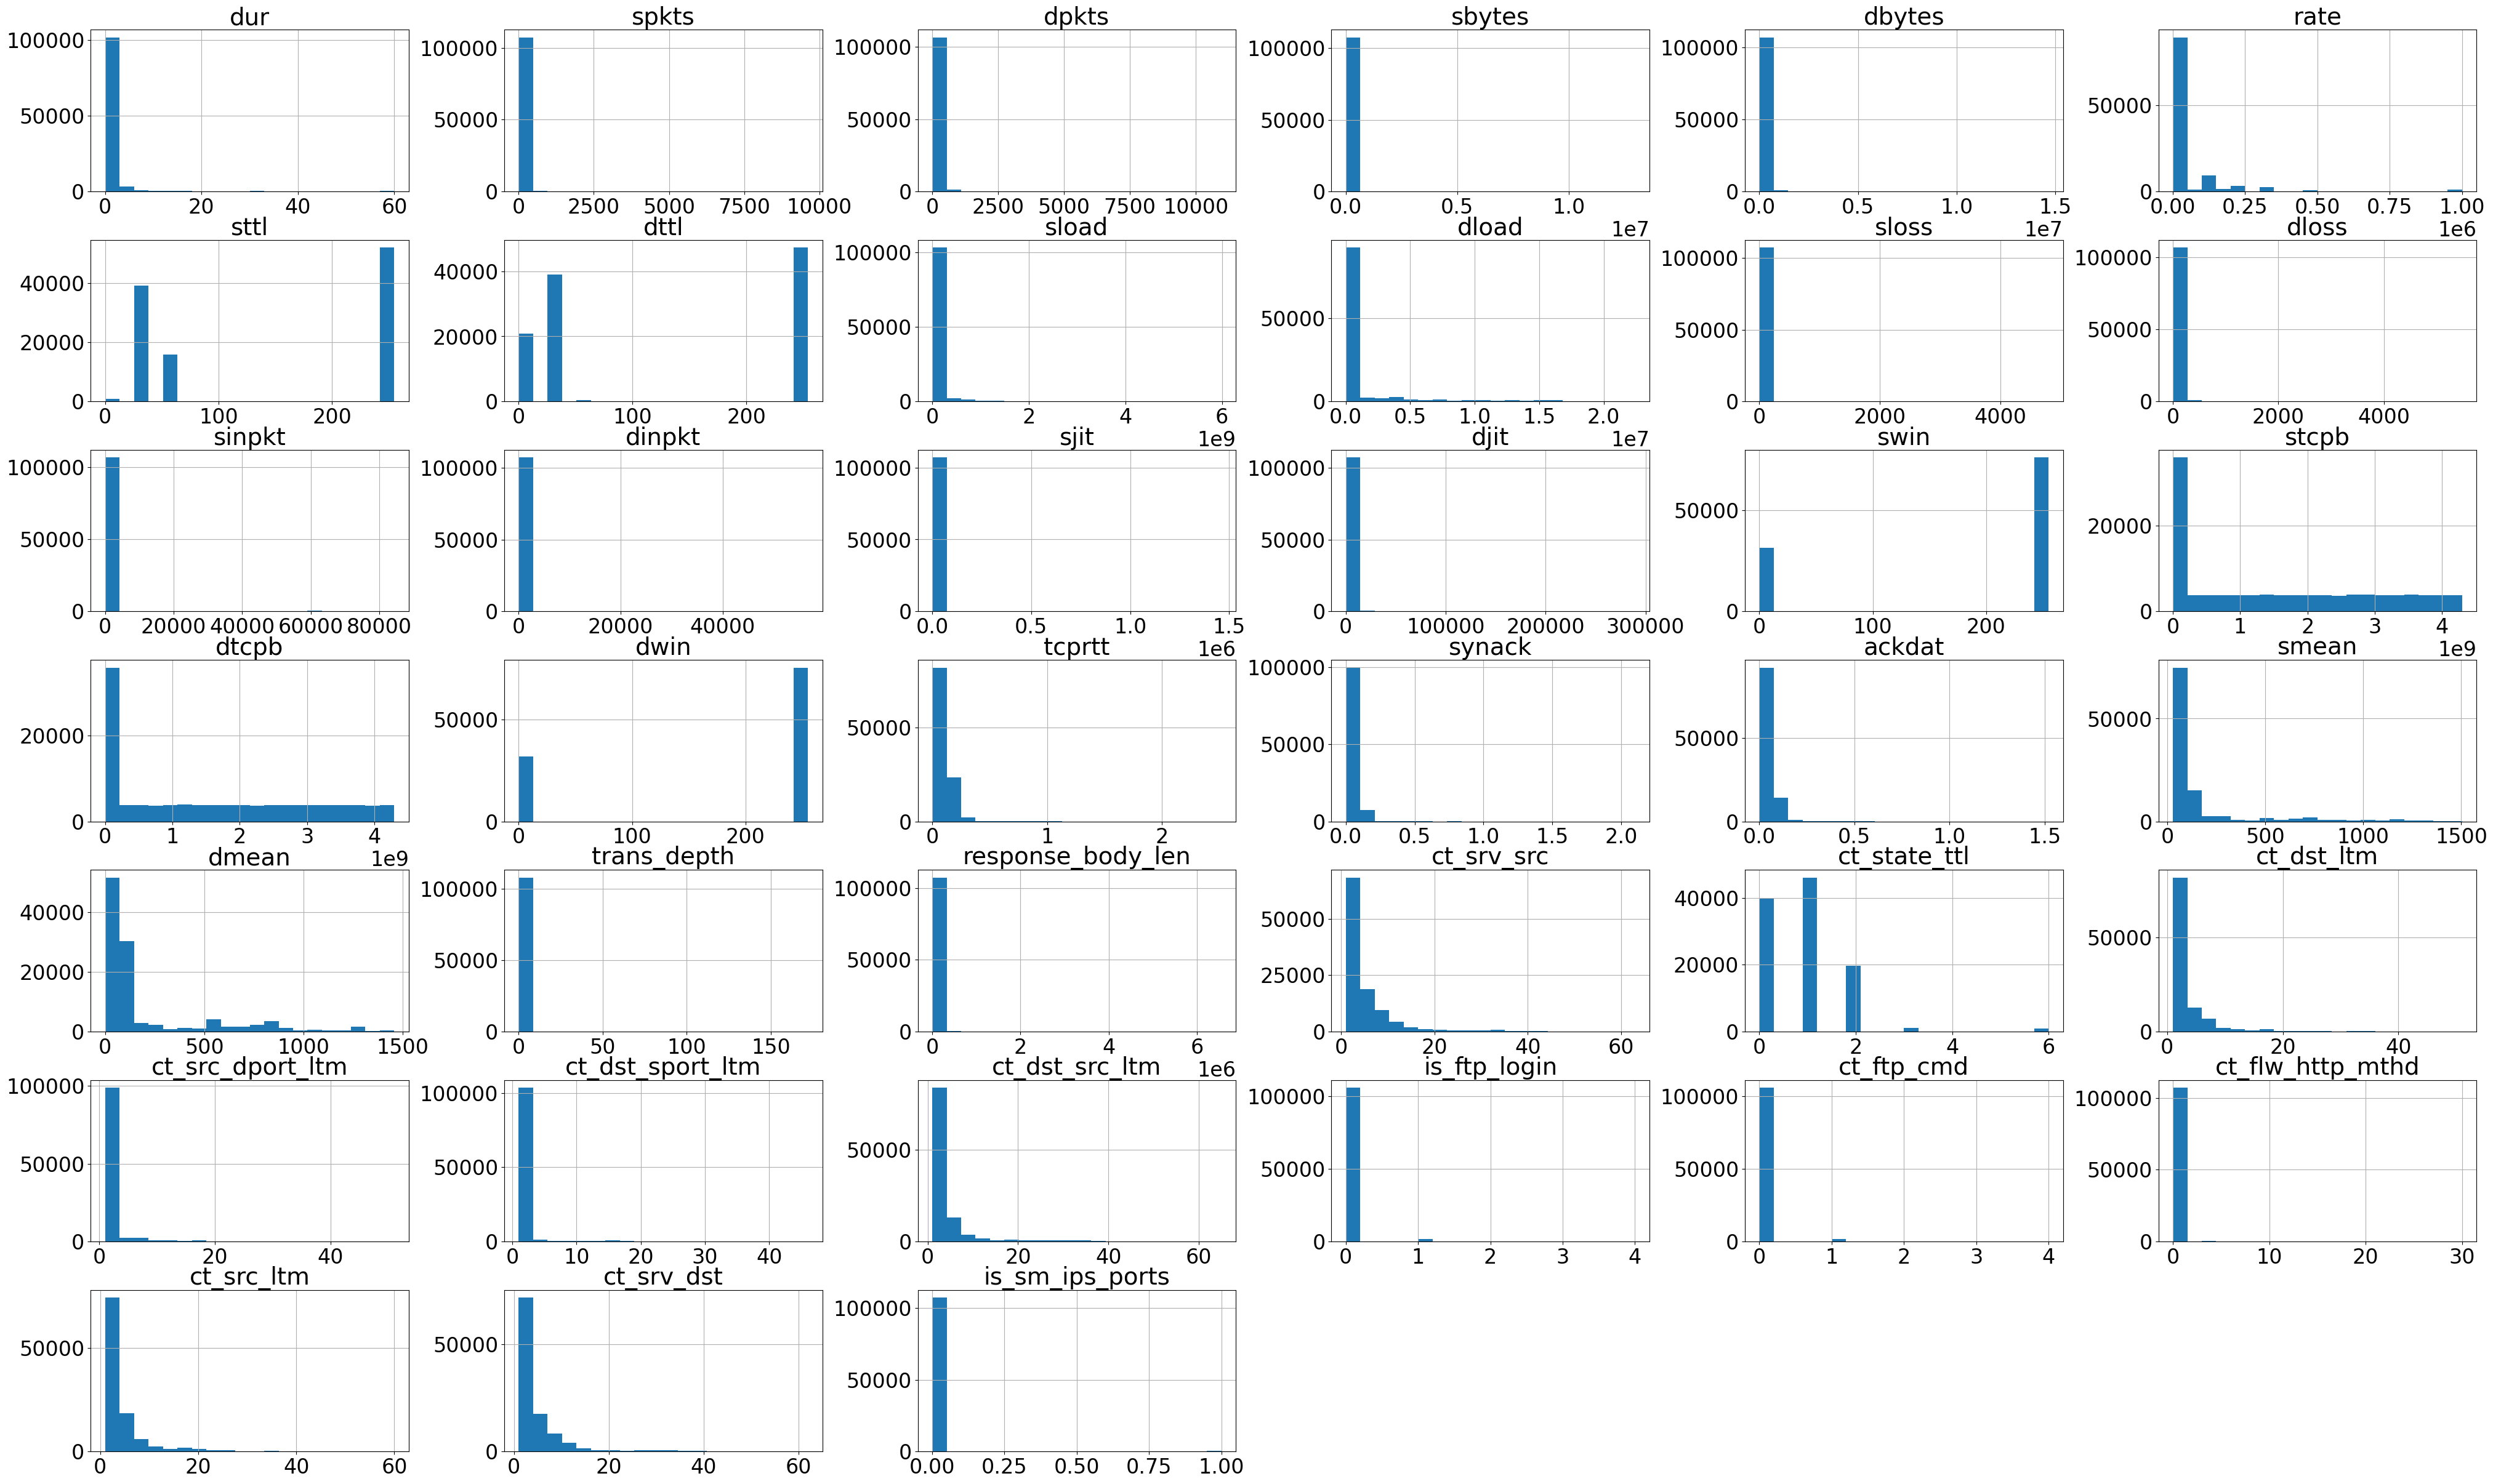

In [19]:
params = {'axes.titlesize':'28',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
df.hist(figsize=(50, 30), bins=20)
plt.show()


# ----------------------------------------------

# minority removal

In [20]:
df.attack_cat.value_counts()   # It is clear that the classes are unbalanced.

Normal            51890
Exploits          19844
Fuzzers           16150
Reconnaissance     7522
Generic            4181
DoS                3806
Analysis           1594
Backdoor           1535
Shellcode          1091
Worms               127
Name: attack_cat, dtype: int64

In [21]:
df2.attack_cat.value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [22]:
df.shape

(107740, 43)

In [23]:
df2.shape

(82332, 43)

In [24]:
minority_labels = ['Analysis','Backdoor','Shellcode','Worms']

# We identify the minority classes in order to remove the data with these labels from the data set in the next steps.

In [25]:
for i in range(4):
    df = df[df['attack_cat'] != minority_labels[i]]

#Eliminating the minority class in the training data set

In [26]:
for i in range(4):
    df2 = df2[df2['attack_cat'] != minority_labels[i]]

#Removing the minority class in the test data set

In [27]:
df.shape

(103393, 43)

In [28]:
df2.shape

(80650, 43)

In [29]:
df.attack_cat.value_counts()    #The number of samples of each class after removing the minority classes

Normal            51890
Exploits          19844
Fuzzers           16150
Reconnaissance     7522
Generic            4181
DoS                3806
Name: attack_cat, dtype: int64

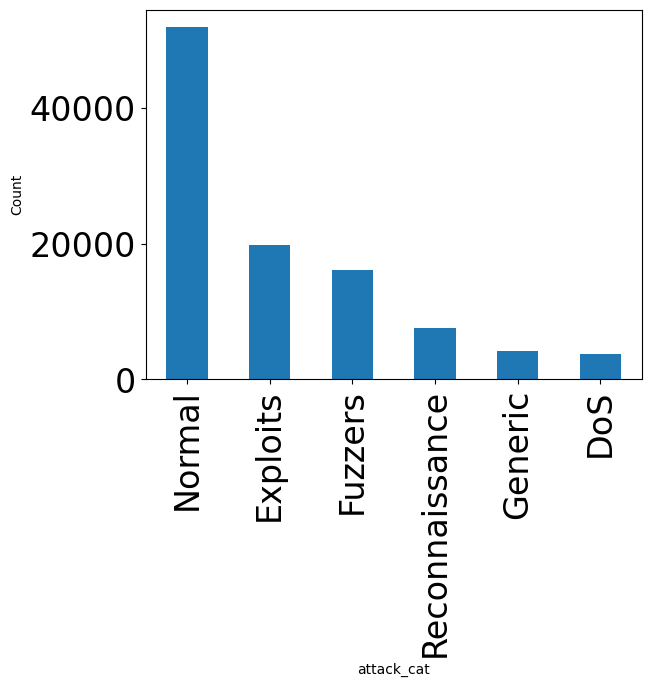

In [30]:
df['attack_cat'].value_counts().plot(kind='bar')
plt.xlabel('attack_cat')
plt.ylabel('Count')
plt.show()

# --------------------------------------

# Convert Categorical to Numerical

In [31]:
#We convert categorical data into numerical data so that we can fit the models on the data

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('The categorical variables are :', categorical)
#We find features with categorical values.

The categorical variables are : ['proto', 'service', 'state', 'attack_cat']


In [34]:
label_encoder = LabelEncoder()
for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

#Convert categorical to numerical

In [35]:
label_encoder = LabelEncoder()
for column in categorical:
    df2[column] = label_encoder.fit_transform(df2[column])

In [36]:
df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,4
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,4
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,4
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,4
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,4


In [37]:
df.attack_cat

0         4
1         4
2         4
3         4
4         4
         ..
175248    0
175267    1
175277    1
175299    1
175305    1
Name: attack_cat, Length: 103393, dtype: int64

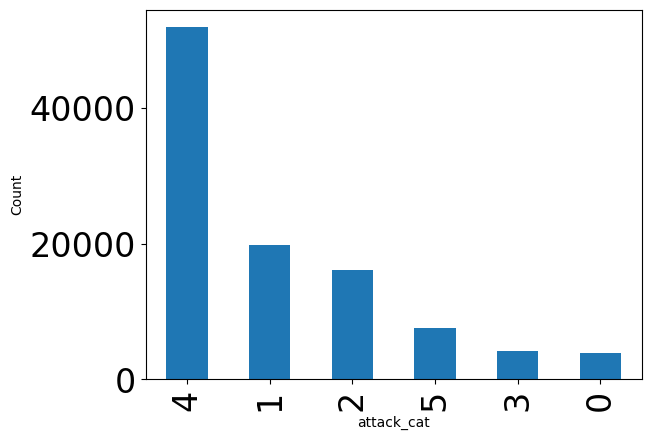

In [38]:
df['attack_cat'].value_counts().plot(kind='bar')
plt.xlabel('attack_cat')
plt.ylabel('Count')
plt.show()

# -----------------------------------------------------

In [78]:
X_train = df.iloc[:, df.columns!='attack_cat']
y_train = df.iloc[:, 42]

In [79]:
X_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175248,2.013791,113,9,2,226,50,272070,3084,136.558356,62,...,1,1,1,1,0,0,0,18,1,0
175267,1.914309,113,9,2,74,30,69997,2132,53.805315,62,...,1,1,1,1,0,0,0,18,1,0
175277,3.719110,113,0,2,66,340,3086,426483,108.897021,62,...,1,1,1,1,0,0,0,2,1,0
175299,0.996503,113,7,2,20,30,942,16684,49.171955,62,...,1,1,1,1,0,0,0,7,1,0


In [80]:
X_test = df2.iloc[:, df2.columns!='attack_cat']
y_test = df2.iloc[:, 42]

In [81]:
X_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,117,0,4,2,0,496,0,90909.090200,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,117,0,4,2,0,1762,0,125000.000300,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,117,0,4,2,0,1068,0,200000.005100,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,117,0,4,2,0,900,0,166666.660800,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,117,0,4,2,0,2126,0,100000.002500,254,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,117,0,4,2,0,104,0,200000.005100,254,...,2,1,1,2,0,0,0,2,1,0
82328,1.106101,111,0,3,20,8,18062,354,24.410067,254,...,2,1,1,1,0,0,0,3,2,0
82329,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,0,1,1,1
82330,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,0,1,1,1


# -------------------------------------------------

# Oversampling

In [82]:
from imblearn.over_sampling import SMOTE
X_train , y_train = SMOTE().fit_resample(X_train , y_train)

#Classes are unbalanced.To solve this problem, we generate artificial data using this code to increase the samples of minority classes

In [83]:
X_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311335,0.304014,113,3,2,10,6,741,285,63.680155,254,...,1,1,1,1,0,0,0,37,1,0
311336,0.793179,113,0,2,10,7,594,344,22.975083,254,...,1,1,1,1,0,0,0,1,1,0
311337,0.837396,113,1,2,10,7,638,334,20.384994,254,...,1,1,1,1,0,0,0,1,1,0
311338,0.435698,113,2,2,10,6,747,303,55.402828,254,...,1,1,1,1,0,0,0,1,1,0


In [84]:
X_train.shape

(311340, 42)

In [85]:
y_train.value_counts()  #The number of samples of all classes was equal

4    51890
2    51890
5    51890
1    51890
0    51890
3    51890
Name: attack_cat, dtype: int64

# ---------------------------------

# Standard and Normal

In [86]:
#In this part, we do standardization and normalization to increase the accuracy of the model

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
#Data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
X_train[0]

array([-0.23325359,  0.11107759, -0.77576762, -0.35122756, -0.11378292,
       -0.11486831, -0.07471545, -0.08666172, -0.46839103,  0.65183202,
        0.96486222, -0.30788644, -0.21050852, -0.09541544, -0.10157089,
       -0.07222271, -0.11690109, -0.15661725, -0.17837477,  0.78753825,
       -0.48967742,  0.61345603,  0.79067851, -0.86351106, -0.79206693,
       -0.8514816 , -0.53612249, -0.36136374, -0.14442825, -0.04409588,
       -0.5892123 , -1.63757469, -0.46473158, -0.37889852, -0.37370448,
       -0.53018539, -0.07676932, -0.07676932, -0.31689441, -0.54994483,
       -0.55415074, -0.04187562])

In [90]:
X_test[0]

array([-0.25248034,  0.35209941, -0.77576762,  2.40818012, -0.13358484,
       -0.13546627, -0.07380402, -0.08733299,  0.11921297,  0.67373891,
       -1.11792795,  0.49322806, -0.2151111 , -0.09541544, -0.10157089,
       -0.08123704, -0.12870128, -0.15755438, -0.18204433, -1.26986924,
       -0.92516031, -0.92607041, -1.26480513, -0.86351106, -0.79206693,
       -0.8514816 ,  0.35725822, -0.53409229, -0.14442825, -0.04409588,
       -0.4786473 ,  1.00702868, -0.46473158, -0.37889852, -0.37370448,
       -0.42152852, -0.07676932, -0.07676932, -0.31689441, -0.54994483,
       -0.44401521, -0.04187562])

In [91]:
#Data normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [92]:
X_train[0]

array([-0.06856515,  0.03265138, -0.22803774, -0.10324372, -0.03344661,
       -0.03376566, -0.02196269, -0.02547431, -0.13768406,  0.19160673,
        0.2836223 , -0.09050355, -0.06187921, -0.02804747, -0.02985688,
       -0.02122995, -0.0343632 , -0.04603781, -0.05243346,  0.23149773,
       -0.14394121,  0.18032607,  0.23242081, -0.25383002, -0.23282894,
       -0.25029394, -0.15759379, -0.10622326, -0.04245484, -0.01296203,
       -0.1731996 , -0.48136687, -0.13660835, -0.11137763, -0.10985084,
       -0.15584857, -0.02256643, -0.02256643, -0.09315146, -0.16165688,
       -0.16289321, -0.01230938])

In [93]:
X_test[0]

array([-0.05832443,  0.08133701, -0.17920683,  0.55630361, -0.03085888,
       -0.0312935 , -0.01704916, -0.02017443,  0.02753889,  0.1556376 ,
       -0.25824786,  0.11393855, -0.04969192, -0.02204152, -0.02346347,
       -0.01876623, -0.02973074, -0.03639598, -0.0420533 , -0.29334718,
       -0.21371741, -0.21392765, -0.29217734, -0.19947608, -0.18297207,
       -0.1966972 ,  0.08252873, -0.12337842, -0.03336376, -0.01018641,
       -0.11057031,  0.23262948, -0.1073557 , -0.08752776, -0.08632791,
       -0.09737554, -0.01773416, -0.01773416, -0.07320445, -0.12704045,
       -0.10257009, -0.00967351])

# ==============================================================

# Models with all features

# -------------------------

# Random Forest Model

In [55]:
#We create a random forest with 100 trees
model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')
# We train the model
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)
#We calculate the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.7390824550526969
              precision    recall  f1-score   support

           0       0.37      0.64      0.47      4089
           1       0.78      0.60      0.68     11132
           2       0.27      0.73      0.40      6062
           3       0.98      0.97      0.97     18871
           4       0.98      0.67      0.80     37000
           5       0.60      0.83      0.70      3496

    accuracy                           0.74     80650
   macro avg       0.66      0.74      0.67     80650
weighted avg       0.85      0.74      0.77     80650



In [56]:
#model.score(X_test_selected,y_test)

In [57]:
accuracy_score(y_test, rf_predictions)

0.7390824550526969

In [58]:
X_train.shape

(311340, 42)

# -------------------------------------------------

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))
print(classification_report(y_test, dtree_predictions))

Accuracy: 0.7101053936763794
              precision    recall  f1-score   support

           0       0.25      0.47      0.33      4089
           1       0.66      0.54      0.59     11132
           2       0.24      0.48      0.32      6062
           3       0.92      0.97      0.94     18871
           4       0.95      0.71      0.81     37000
           5       0.45      0.61      0.52      3496

    accuracy                           0.71     80650
   macro avg       0.58      0.63      0.59     80650
weighted avg       0.79      0.71      0.74     80650



# -----------------------------------------------

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

Accuracy: 0.6816243025418475
              precision    recall  f1-score   support

           0       0.27      0.62      0.38      4089
           1       0.73      0.49      0.59     11132
           2       0.24      0.59      0.35      6062
           3       0.95      0.96      0.96     18871
           4       0.98      0.61      0.75     37000
           5       0.36      0.72      0.48      3496

    accuracy                           0.68     80650
   macro avg       0.59      0.67      0.58     80650
weighted avg       0.82      0.68      0.72     80650



In [60]:
X_train.shape

(311340, 42)

# ------------------------------------------

# ANN

In [94]:
from keras.models import Sequential
from keras.layers import Dense

In [95]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [96]:
#Setting up an artificial neural network
ANN_model = Sequential()
#Creating input layer
ANN_model.add(Dense(200, input_dim=42, activation='sigmoid'))
ANN_model.add(Dense(400, input_dim=42, activation='sigmoid'))
ANN_model.add(Dense(200, input_dim=42, activation='sigmoid'))
#Creating output layer
ANN_model.add(Dense(6, activation='softmax'))
#Compiling the model along with the definition of optimizer
ANN_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
ANN_model.fit(X_train, y_train, batch_size=50, epochs=10)


Epoch 1/10
6227/6227 [==============================] - 42s 7ms/step - loss: 0.9481 - accuracy: 0.6203
Epoch 2/10
6227/6227 [==============================] - 39s 6ms/step - loss: 0.7481 - accuracy: 0.7021
Epoch 3/10
6227/6227 [==============================] - 37s 6ms/step - loss: 0.6954 - accuracy: 0.7266
Epoch 4/10
6227/6227 [==============================] - 39s 6ms/step - loss: 0.6672 - accuracy: 0.7382
Epoch 5/10
6227/6227 [==============================] - 38s 6ms/step - loss: 0.6505 - accuracy: 0.7449
Epoch 6/10
6227/6227 [==============================] - 39s 6ms/step - loss: 0.6377 - accuracy: 0.7502
Epoch 7/10
6227/6227 [==============================] - 40s 6ms/step - loss: 0.6297 - accuracy: 0.7535
Epoch 8/10
6227/6227 [==============================] - 38s 6ms/step - loss: 0.6221 - accuracy: 0.7571
Epoch 9/10
6227/6227 [==============================] - 40s 6ms/step - loss: 0.6172 - accuracy: 0.7589
Epoch 10/10
6227/6227 [==============================] - 40s 6ms/step - l

In [100]:
predictions = ANN_model.predict(X_test)

2521/2521 [==============================] - 5s 2ms/step


In [101]:
ANN_model.evaluate(X_test,y_test)

2521/2521 [==============================] - 7s 3ms/step - loss: 0.8447 - accuracy: 0.6845


[0.8446996808052063, 0.6844885349273682]

# ==============================================================

# Feature Processing-Part1

In [102]:
#Feature selection by tree-based method.

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators = 100)
clf = clf.fit(X_train, y_train)

clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
Xnew = model.transform(X_train)
Xnew.shape

X_test_selected = model.transform(X_test)


In [104]:
X_test_selected.shape

(80650, 13)

In [105]:
Xnew.shape

(311340, 13)

In [106]:
X_test_selected.shape

(80650, 13)

In [107]:
Xnew.shape[1]

13

# ---------------------------------------

# Random Forest Model

In [ ]:

model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(Xnew, y_train)
rf_predictions = model.predict(X_test_selected)

print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.724922504649721
              precision    recall  f1-score   support

           0       0.34      0.52      0.41      4089
           1       0.77      0.56      0.65     11132
           2       0.25      0.65      0.36      6062
           3       0.95      0.97      0.96     18871
           4       0.98      0.68      0.80     37000
           5       0.52      0.81      0.64      3496

    accuracy                           0.72     80650
   macro avg       0.63      0.70      0.64     80650
weighted avg       0.83      0.72      0.76     80650



In [ ]:
accuracy_score(y_test, rf_predictions)

0.724922504649721

# --------------------------------------

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion = 'entropy').fit(Xnew, y_train)
dtree_predictions = dtree_model.predict(X_test_selected)

print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))
print(classification_report(y_test, dtree_predictions))

Accuracy: 0.7227650340979541
              precision    recall  f1-score   support

           0       0.30      0.44      0.36      4089
           1       0.70      0.53      0.60     11132
           2       0.24      0.52      0.33      6062
           3       0.89      0.97      0.93     18871
           4       0.95      0.71      0.82     37000
           5       0.57      0.79      0.66      3496

    accuracy                           0.72     80650
   macro avg       0.61      0.66      0.62     80650
weighted avg       0.80      0.72      0.75     80650



# -----------------------------------------

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(Xnew, y_train)
knn_predictions = knn.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

Accuracy: 0.7178425294482331
              precision    recall  f1-score   support

           0       0.33      0.63      0.43      4089
           1       0.80      0.53      0.64     11132
           2       0.23      0.56      0.32      6062
           3       0.96      0.97      0.96     18871
           4       0.96      0.67      0.79     37000
           5       0.51      0.81      0.63      3496

    accuracy                           0.72     80650
   macro avg       0.63      0.70      0.63     80650
weighted avg       0.83      0.72      0.75     80650



# ------------------------------------

# ANN

In [109]:

ANN_model = Sequential()

ANN_model.add(Dense(200, input_dim=Xnew.shape[1], activation='sigmoid'))
ANN_model.add(Dense(400, input_dim=Xnew.shape[1], activation='sigmoid'))
ANN_model.add(Dense(200, input_dim=Xnew.shape[1], activation='sigmoid'))

ANN_model.add(Dense(6, activation='softmax'))

ANN_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
ANN_model.fit(Xnew, y_train, batch_size=50, epochs=10)

Epoch 1/10
6227/6227 [==============================] - 49s 7ms/step - loss: 0.9918 - accuracy: 0.5970
Epoch 2/10
6227/6227 [==============================] - 38s 6ms/step - loss: 0.7727 - accuracy: 0.6893
Epoch 3/10
6227/6227 [==============================] - 40s 6ms/step - loss: 0.7262 - accuracy: 0.7134
Epoch 4/10
6227/6227 [==============================] - 39s 6ms/step - loss: 0.6992 - accuracy: 0.7253
Epoch 5/10
6227/6227 [==============================] - 39s 6ms/step - loss: 0.6794 - accuracy: 0.7346
Epoch 6/10
6227/6227 [==============================] - 40s 6ms/step - loss: 0.6635 - accuracy: 0.7403
Epoch 7/10
6227/6227 [==============================] - 40s 6ms/step - loss: 0.6522 - accuracy: 0.7453
Epoch 8/10
6227/6227 [==============================] - 39s 6ms/step - loss: 0.6445 - accuracy: 0.7482
Epoch 9/10
6227/6227 [==============================] - 41s 7ms/step - loss: 0.6376 - accuracy: 0.7507
Epoch 10/10
6227/6227 [==============================] - 41s 7ms/step - l

In [111]:
predictions = ANN_model.predict(X_test_selected)
ANN_model.evaluate(X_test_selected,y_test)

2521/2521 [==============================] - 6s 2ms/step - loss: 0.7372 - accuracy: 0.7040


[0.7372429370880127, 0.7039925456047058]

# ==============================================================

# Feature Processing-Part2

# information gain and feature selection

In [112]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif



X = df.drop('attack_cat', axis=1)
y = df['attack_cat']

#We calculate the information gain for each feature
info_gains = mutual_info_classif(X, y)

#We make a table including features and information gain
feature_info_gains = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})

#We sort the features in the table based on information gain
feature_info_gains = feature_info_gains.sort_values(by='Information Gain', ascending=False)


In [113]:
X , y = SMOTE().fit_resample(X, y)

In [114]:
feature_info_gains.head(25)

,Feature,Information Gain
6,sbytes,0.818218
7,dbytes,0.645613
26,smean,0.566625
9,sttl,0.517900
27,dmean,0.510366
31,ct_state_ttl,0.446935
10,dttl,0.446844
11,sload,0.438868
12,dload,0.401162
16,dinpkt,0.401057


In [115]:
X_train_ig = X[feature_info_gains["Feature"][0:25]]

In [116]:
X_test_ig = df2[feature_info_gains["Feature"][0:25]]

In [117]:
X_train_ig.shape

(311340, 25)

In [118]:
X_train_ig

,sbytes,dbytes,smean,sttl,dmean,ct_state_ttl,dttl,sload,dload,dinpkt,...,ackdat,sinpkt,dloss,sjit,djit,ct_srv_dst,spkts,service,ct_srv_src,sloss
0,258,172,43,252,43,0,254,1.415894e+04,8495.365234,8.375000,...,0.000000,24.295600,0,30.177547,11.830604,1,6,0,1,0
1,734,42014,52,62,1106,1,252,8.395112e+03,503571.312500,15.432865,...,0.000000,49.915000,17,61.426934,1387.778330,6,14,0,43,2
2,364,13186,46,62,824,1,252,1.572272e+03,60929.230470,102.737203,...,0.050439,231.875571,6,17179.586860,11420.926230,6,8,0,7,1
3,628,770,52,62,64,1,252,2.740179e+03,3358.622070,90.235726,...,0.000000,152.876547,3,259.080172,4991.784669,1,12,3,1,1
4,534,268,53,254,45,1,252,8.561499e+03,3987.059814,75.659602,...,0.057234,47.750333,1,2415.837634,115.807000,39,10,0,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311335,168,0,84,254,0,2,0,5.600000e+07,0.000000,0.000000,...,0.000000,0.012000,0,0.000000,0.000000,1,2,0,3,0
311336,168,0,84,254,0,2,0,7.466666e+07,0.000000,0.000000,...,0.000000,0.009000,0,0.000000,0.000000,1,2,0,8,0
311337,664,320,66,254,44,1,252,8.313510e+03,3439.785725,97.339331,...,0.018817,73.105005,1,5318.103780,151.057251,1,10,1,1,2
311338,815,340,81,254,44,1,252,1.061337e+04,4308.909556,76.880415,...,0.079505,57.662592,1,3651.046234,128.382648,1,10,5,1,2


<Axes: >

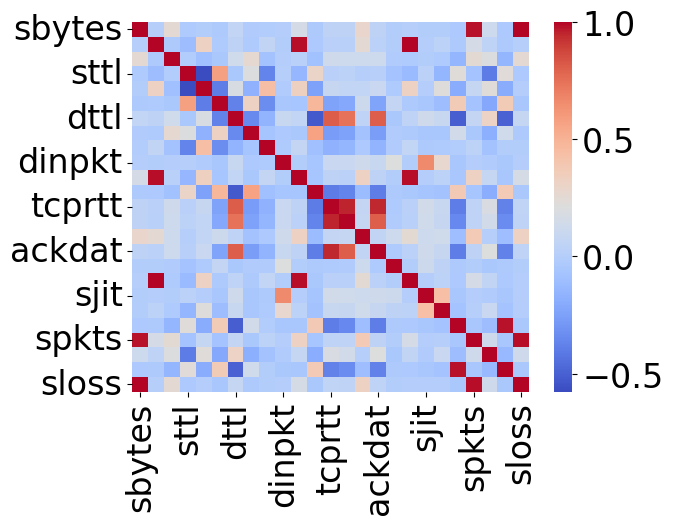

In [120]:

#Calculating the correlation matrix of features
corr_matrix = X_train_ig.corr()

#Drawing correlation matrix using heatmap
sns.heatmap(corr_matrix,cmap='coolwarm')

In [121]:
scaler = StandardScaler()
X_train_ig = scaler.fit_transform(X_train_ig)
X_test_ig = scaler.transform(X_test_ig)

In [ ]:
X_train_ig

In [123]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_train_ig = norm.fit_transform(X_train_ig)
X_test_ig = norm.transform(X_test_ig)

In [124]:
y_train.shape

(311340, 6)

In [125]:
y.shape

(311340,)

# ----------------------------------------

# Random Forest

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

rf_model.fit(X_train_ig, y_train)
rf_predictions = rf_model.predict(X_test_ig)

print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.7493862368257904
              precision    recall  f1-score   support

           0       0.40      0.69      0.51      4089
           1       0.81      0.60      0.69     11132
           2       0.27      0.73      0.40      6062
           3       0.99      0.97      0.98     18871
           4       0.97      0.68      0.80     37000
           5       0.64      0.83      0.72      3496

    accuracy                           0.75     80650
   macro avg       0.68      0.75      0.68     80650
weighted avg       0.86      0.75      0.78     80650



# hyperparameters in Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=30)

In [ ]:

param_dist = {"n_estimators": [100, 150],
              "max_depth": [5, 10, 15],
              "max_features": [20, 30]}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,cv=5)

rf_random.fit(X_train_ig, y_train)

In [ ]:
print(rf_random.best_params_)

# --------------------------------------------------

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy').fit(X_train_ig, y_train)
dtree_predictions = dt_model.predict(X_test_ig)

#testing set accuracy
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))
print(classification_report(y_test, dtree_predictions))

Accuracy: 0.7488034717916925
              precision    recall  f1-score   support

           0       0.37      0.70      0.48      4089
           1       0.75      0.55      0.64     11132
           2       0.27      0.61      0.37      6062
           3       0.98      0.97      0.98     18871
           4       0.95      0.72      0.82     37000
           5       0.66      0.79      0.72      3496

    accuracy                           0.75     80650
   macro avg       0.66      0.72      0.67     80650
weighted avg       0.83      0.75      0.77     80650



# hyperparameters in Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Define the set of parameters to search
param_dist = {
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5)
}

# Applying random search method
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
random_search.fit(X_train_ig, y_train)

# Printing the best value of hyperparameters
print(random_search.best_params_)

{'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 9}


# -----------------------------------------------------

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_ig, y)
knn_predictions = knn_model.predict(X_test_ig)
print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9 , metric = 'manhattan' , weights = 'distance').fit(X_train_ig, y_train)
knn_predictions = knn.predict(X_test_ig)
print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

Accuracy: 0.7274147551146931
              precision    recall  f1-score   support

           0       0.32      0.46      0.38      4089
           1       0.73      0.60      0.66     11132
           2       0.26      0.68      0.37      6062
           3       0.99      0.97      0.98     18871
           4       0.97      0.67      0.79     37000
           5       0.51      0.82      0.63      3496

    accuracy                           0.73     80650
   macro avg       0.63      0.70      0.64     80650
weighted avg       0.83      0.73      0.76     80650



# hyperparameters in KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {'n_neighbors': [5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

knn_random = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions=param_dist, cv=5)

knn_random.fit(X_train_ig, y_train)

# --------------------------------------------------

# ANN

In [126]:

ANN_model = Sequential()

ANN_model.add(Dense(200, input_dim=25, activation='sigmoid'))
ANN_model.add(Dense(400, input_dim=25, activation='sigmoid'))
ANN_model.add(Dense(400, input_dim=25, activation='sigmoid'))
ANN_model.add(Dense(200, input_dim=25, activation='sigmoid'))

ANN_model.add(Dense(6, activation='softmax'))

ANN_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
ANN_model.fit(X_train_ig, y_train, batch_size=50, epochs=10)

Epoch 1/10
6227/6227 [==============================] - 58s 9ms/step - loss: 1.0702 - accuracy: 0.5510
Epoch 2/10
6227/6227 [==============================] - 59s 10ms/step - loss: 0.8105 - accuracy: 0.6812
Epoch 3/10
6227/6227 [==============================] - 57s 9ms/step - loss: 0.7326 - accuracy: 0.7142
Epoch 4/10
6227/6227 [==============================] - 57s 9ms/step - loss: 0.6854 - accuracy: 0.7306
Epoch 5/10
6227/6227 [==============================] - 55s 9ms/step - loss: 0.6637 - accuracy: 0.7401
Epoch 6/10
6227/6227 [==============================] - 57s 9ms/step - loss: 0.6514 - accuracy: 0.7451
Epoch 7/10
6227/6227 [==============================] - 57s 9ms/step - loss: 0.6418 - accuracy: 0.7495
Epoch 8/10
6227/6227 [==============================] - 76s 12ms/step - loss: 0.6331 - accuracy: 0.7530
Epoch 9/10
6227/6227 [==============================] - 57s 9ms/step - loss: 0.6258 - accuracy: 0.7562
Epoch 10/10
6227/6227 [==============================] - 58s 9ms/step -

In [129]:
predictions = ANN_model.predict(X_test_ig)
ANN_model.evaluate(X_test_ig,y_test)   
#If we increase the number of epochs, the accuracy of the model will increase.

2521/2521 [==============================] - 13s 5ms/step - loss: 0.6776 - accuracy: 0.7193


[0.6776184439659119, 0.7193180322647095]

# ==============================================================

# Ensembel

In [133]:
#In this part, we combine the models made in the previous parts to achieve better accuracy.

In [134]:
from sklearn.ensemble import VotingClassifier

In [ ]:
estimators=[('knn', knn_model), ('RF', rf_model), ('Dt', dt_model)]

ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(X_train_ig, y)

y_pred_ensemble = ensemble.predict(X_test_ig)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

Accuracy: 0.7460260384376938
              precision    recall  f1-score   support

           0       0.37      0.73      0.49      4089
           1       0.78      0.59      0.67     11132
           2       0.27      0.70      0.39      6062
           3       0.99      0.97      0.98     18871
           4       0.97      0.68      0.80     37000
           5       0.69      0.81      0.74      3496

    accuracy                           0.75     80650
   macro avg       0.68      0.75      0.68     80650
weighted avg       0.85      0.75      0.78     80650



# ==============================================================